<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Zadachi_klassifikacii_i_klasterizacii/DZ_Kondrstev_STPY_48_clas_clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Преподаватель:** Олег Булыгин

### **Домашнее задание к лекции «Задачи классификации и кластеризации»**

Задание.

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

### Подготавливаем данные

In [1]:
from sklearn.datasets import load_iris  # Загружает датасет с цветками iris'а (функция load_iris из библиотеки sklearn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Функция для разделения выборки на тренировочную и тестовую
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Класс для выполнения линейного дискриминантного анализа (LDA)
from sklearn.metrics import accuracy_score  # Функция для вычисления точности (accuracy) модели
from sklearn.linear_model import LogisticRegression  # Класс для выполнения логистической регрессии

"Набор данных об ирисах". Этот набор данных был первоначально использован Сэром Р.А. Фишером и содержит информацию о четырех числовых признаках (длина чашелистика, ширина чашелистика, длина лепестка, ширина лепестка) и классе (вид ириса).

Некоторая сводка статистик для каждого признака в наборе данных:
- Для длины чашелистика: минимальное значение 4.3, максимальное значение 7.9, среднее значение 5.84, стандартное отклонение 0.83, корреляция с классом 0.7826.
- Для ширины чашелистика: минимальное значение 2.0, максимальное значение 4.4, среднее значение 3.05, стандартное отклонение 0.43, корреляция с классом -0.4194.
- Для длины лепестка: минимальное значение 1.0, максимальное значение 6.9, среднее значение 3.76, стандартное отклонение 1.76, высокая корреляция с классом 0.9490.
- Для ширины лепестка: минимальное значение 0.1, максимальное значение 2.5, среднее значение 1.20, стандартное отклонение 0.76, высокая корреляция с классом 0.9565.

Набор данных содержит 150 экземпляров, из которых 50 принадлежат каждому из трех классов. Классы ирисов в наборе данных включают `Iris-Setosa`, `Iris-Versicolour` и `Iris-Virginica`.

Этот набор данных является известным и широко используется в литературе по распознаванию образов и машинному обучению. Ирисы в этом наборе данных могут быть классифицированы на основе их признаков.

In [2]:
# Загрузка данных из датасета iris
iris = load_iris()
print("Ключи словаря (iris.keys):", iris.keys())
print("\nДанные (iris.data):", iris.data[:5])
print("\nЦелевые значения (iris.target):", iris.target)
print("\nИмена классов (iris.target_names):", iris.target_names)
print("\nИмена признаков (iris.feature_names):", iris.feature_names)

Ключи словаря (iris.keys): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Данные (iris.data): [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Целевые значения (iris.target): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Имена классов (iris.target_names): ['setosa' 'versicolor' 'virginica']

Имена признаков (iris.feature_names): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

`iris.DESCR` - это свойство датасета iris, которое содержит описание этого датасета. Когда вы вызываете `print(iris.DESCR)`, оно будет выводиться на экран.

In [4]:
# Создание DataFrame с признаками
data = pd.DataFrame(iris.data[:, :2], columns=iris.feature_names[:2])
variety = iris.target

Этот код выполняет две операции:

1. Создание DataFrame:
   `data = pd.DataFrame(iris.data[:, :2], columns=iris.feature_names[:2])`
   Здесь мы создаем новый DataFrame с именем `data`. Мы используем `iris.data[:, :2]`, чтобы взять только первые две колонки из массива `iris.data`. Мы также указываем `columns=iris.feature_names[:2]`, чтобы назвать колонки в новом DataFrame с соответствующими именами из `iris.feature_names` для первых двух признаков.

2. Создание переменной `variety`:
   `variety = iris.target`
   Мы создаем переменную `variety` и присваиваем ей значения из `iris.target`. `iris.target` содержит информацию о классах целевых переменных для каждого образца в датасете `iris`. Результаты `variety` представляют собой числовые метки классов, к которым принадлежат каждый из 150 экземпляров ирисов в наборе данных. Код 0 соответствует классу `Setosa`, код 1 - классу `Versicolour`, а код 2 - классу `Virginica`.

В итоге, `data` будет содержать два признака (длина чашелистика и ширина чашелистика) из датасета iris, а `variety` будет содержать классы целевых переменных (типы ирисов) для каждого образца в датасете `iris`.

In [5]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [6]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Построение модели LDA

In [7]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, variety, random_state=42)

In [8]:
lda = LinearDiscriminantAnalysis()

`lda = LinearDiscriminantAnalysis()` - это создание экземпляра класса LinearDiscriminantAnalysis из библиотеки scikit-learn.

LinearDiscriminantAnalysis (LDA) - это метод, используемый для анализа и классификации данных. Он является методом обучения с учителем, используемым для поиска оптимального линейного преобразования признаков для максимизации разделения классов в данных.

In [9]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0])

In [11]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [12]:
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

- Модель LDA показала достаточно высокую точность предсказаний на тестовой выборке (около 86.8%).

In [13]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.83421967,  8.36880937],
       [ 1.5215595 , -3.81430503],
       [ 3.81202284, -3.79343242]])

Из коэффициентов дискриминантных линий, можно сделать следующие выводы:

1. Первый признак (`sepal length (cm)` - длина чашелистика) является наиболее важным признаком для разделения классов. Он имеет отрицательный коэффициент для первого класса (возможно, это означает, что более короткие значения чашелистика свойственны первому классу) и положительный коэффициент для второго и третьего классов (возможно, они характеризуются более длинными значениями чашелистика).

2. Второй признак (`sepal width (cm)` - ширина лепестка) также вносит вклад в разделение классов. Он имеет положительный коэффициент для первого класса (это может указывать на более широкие значения лепестка в первом классе) и отрицательные коэффициенты для второго и третьего классов (что может означать более узкие значения лепестка в этих классах).


### Визуализируем исходные точки данных, а также центроиды классов. С помощью графика рассеяния (`scatter plot`)

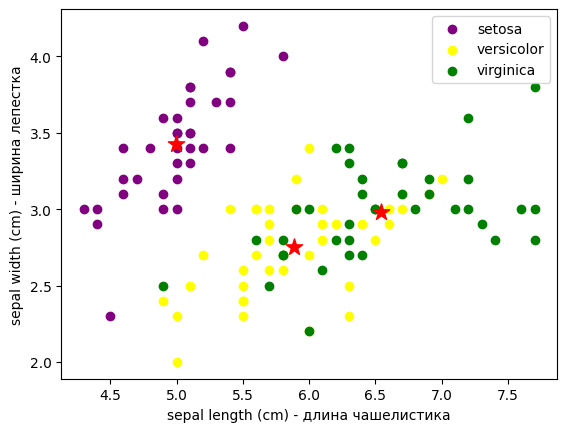

In [14]:
# Создание отдельных подмножеств данных для каждого класса
setosa = X_train[y_train == 0]
versicolor = X_train[y_train == 1]
virginica = X_train[y_train == 2]

# Отображение точек для каждого класса с уникальными цветами
plt.scatter(x=setosa['sepal length (cm)'], y=setosa['sepal width (cm)'], c='purple', label='setosa')
plt.scatter(x=versicolor['sepal length (cm)'], y=versicolor['sepal width (cm)'], c='yellow', label='versicolor')
plt.scatter(x=virginica['sepal length (cm)'], y=virginica['sepal width (cm)'], c='green', label='virginica')

# Добавление координат центроидов
centroids = lda.means_
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=150, marker='*')  # Центроиды

plt.legend()
plt.xlabel('sepal length (cm) - длина чашелистика')
plt.ylabel('sepal width (cm) - ширина лепестка')
plt.show()


### Визуализируем предсказания для тестовой выборки и центры классов с помощью графика рассеяния (`scatter plot`)




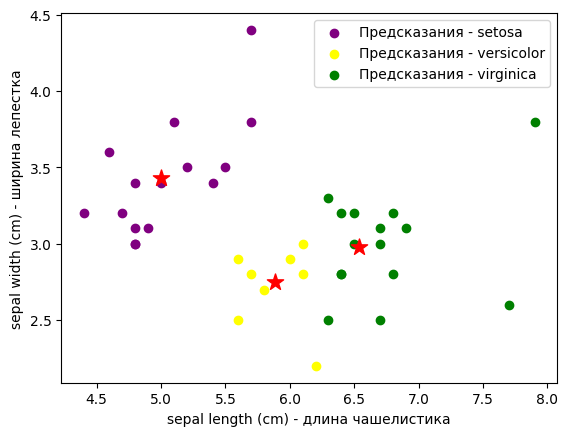

In [15]:
# Предсказание классов для тестовой выборки
predicted_classes = lda.predict(X_test)

# Визуализация точек для каждого класса с использованием предсказанных меток классов
plt.scatter(x=X_test[predicted_classes == 0]['sepal length (cm)'], y=X_test[predicted_classes == 0]['sepal width (cm)'], c='purple', label='Предсказания - setosa')
plt.scatter(x=X_test[predicted_classes == 1]['sepal length (cm)'], y=X_test[predicted_classes == 1]['sepal width (cm)'], c='yellow', label='Предсказания - versicolor')
plt.scatter(x=X_test[predicted_classes == 2]['sepal length (cm)'], y=X_test[predicted_classes == 2]['sepal width (cm)'], c='green', label='Предсказания - virginica')

# Визуализация центроидов классов
centroids = lda.means_
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=150, marker='*')  # Центроиды

plt.legend()
plt.xlabel('sepal length (cm) - длина чашелистика')
plt.ylabel('sepal width (cm) - ширина лепестка')
plt.show()


In [16]:
# посмотрим на наши центроиды
lda.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

Анализируя координаты центроидов, можно сказать, что средние значения признаков для каждого класса отличаются, что свидетельствует о некоторой степени разделения классов в пространстве признаков.

### Построение модели логистической регрессиии

In [17]:
lr = LogisticRegression()

In [18]:
lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
lr.predict(X_test)

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0])

In [20]:
# вероятность принадлежности к тому или иному классу
lr.predict_proba(X_test)

array([[2.38318259e-02, 5.39569918e-01, 4.36598256e-01],
       [7.11056563e-01, 1.28646086e-01, 1.60297351e-01],
       [2.58701455e-05, 1.58881246e-01, 8.41092884e-01],
       [4.60276708e-02, 5.35393890e-01, 4.18578439e-01],
       [1.73706586e-03, 3.32783951e-01, 6.65478983e-01],
       [6.73659907e-01, 2.06738542e-01, 1.19601551e-01],
       [1.65740832e-01, 5.68996052e-01, 2.65263116e-01],
       [2.81452331e-03, 2.47752254e-01, 7.49433223e-01],
       [2.44866688e-03, 6.55794505e-01, 3.41756828e-01],
       [4.87774735e-02, 6.34411490e-01, 3.16811037e-01],
       [1.81738012e-02, 3.29110344e-01, 6.52715855e-01],
       [8.02288177e-01, 1.67231642e-01, 3.04801811e-02],
       [6.66531987e-01, 1.93443028e-01, 1.40024985e-01],
       [8.05101962e-01, 1.58704881e-01, 3.61931567e-02],
       [9.56340388e-01, 2.77423289e-02, 1.59172831e-02],
       [5.15333830e-02, 3.53390399e-01, 5.95076218e-01],
       [1.00587209e-02, 3.74906683e-01, 6.15034596e-01],
       [4.95500397e-02, 7.20598

In [21]:
accuracy_score(y_test, lr.predict(X_test))

0.8421052631578947

На основании этих данных можно сделать следующие выводы:
1. Модель логистической регрессии успешно обучилась на тренировочной выборке и смогла предсказать метки классов на тестовой выборке.
2. Предсказанная метка класса для каждого объекта в тестовой выборке указывает на класс, к которому он, согласно модели, с большей вероятностью может принадлежать.
3. Вероятности принадлежности к каждому классу, предоставленные моделью, могут быть полезны для анализа и принятия решений. Например, на основании вероятности можно решить, насколько уверена модель в своем прогнозе.
4. Общая точность модели на тестовой выборке составила 0.8421, что означает, что примерно 84.21% объектов в тестовой выборке были правильно классифицированы моделью.

### Кластеризация

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

Класс `StandardScaler` из библиотеки `sklearn.preprocessing`. `StandardScaler` представляет собой класс, который выполняет стандартизацию (масштабирование) признаков.

`KMeans` представляет собой алгоритм кластеризации, используемый для разделения данных на `K` кластеров на основе их сходства по характеристикам.

Класс `AgglomerativeClustering` предоставляет методы для обучения модели (`fit`) и выполнения кластеризации (`predict`)

Модуль `sklearn.metrics` в библиотеке `scikit-learn` содержит множество функций для оценки качества моделей машинного обучения. В частности, для оценки качества кластеризации можно использовать функцию `silhouette_score`.

Модуль `scipy.cluster.hierarchy` предоставляет функции для выполнения иерархической кластеризации, также известной как кластеризация в виде дендрограммы.

- Функция `linkage` выполняет иерархическую кластеризацию путем объединения ближайших групп наблюдений в новые группы на основе расстояний между ними. Она принимает входные данные и метод расчета расстояний, а затем возвращает матрицу связей, которая содержит информацию о процессе объединения групп.
- Функция `dendrogram` строит дендрограмму на основе матрицы связей, полученной с помощью функции `linkage`. Дендрограмма представляет собой графическое представление иерархической кластеризации, где каждое наблюдение изображается в виде листового узла, а объединение наблюдений представляется в виде ветвей.

In [23]:
# приведем данные к единому масштабу
scaler = StandardScaler()

# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

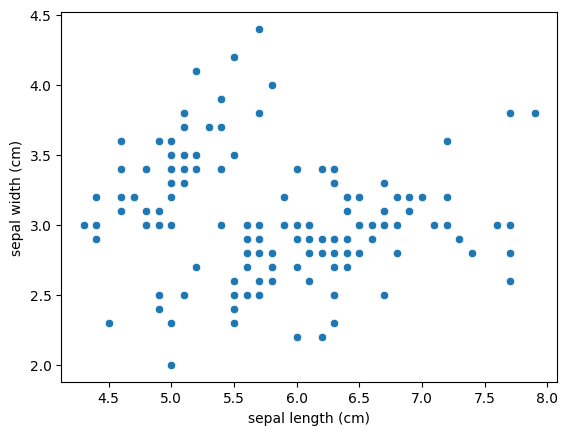

In [24]:
# Кластеризируем цветы по длине и ширине лепестка
sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'])
plt.show()

,sepal length (cm),sepal width (cm),Clusters_k3
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,1
147,6.5,3.0,0
148,6.2,3.4,0


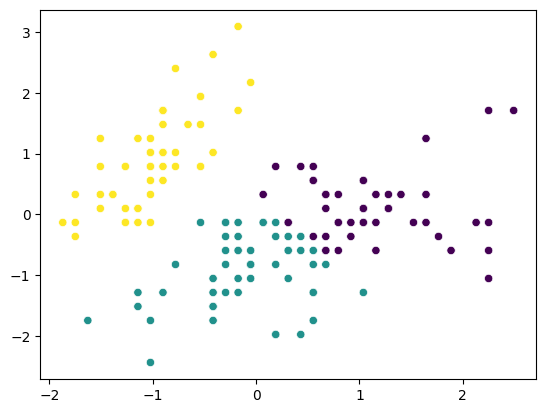

In [25]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

predictions = kmeans.fit_predict(X_scaled)

# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
data['Clusters_k3'] = predictions
display(data)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], c=predictions, cmap='viridis')
plt.show()

### Визуализируем кластеризацию (графика локтя)

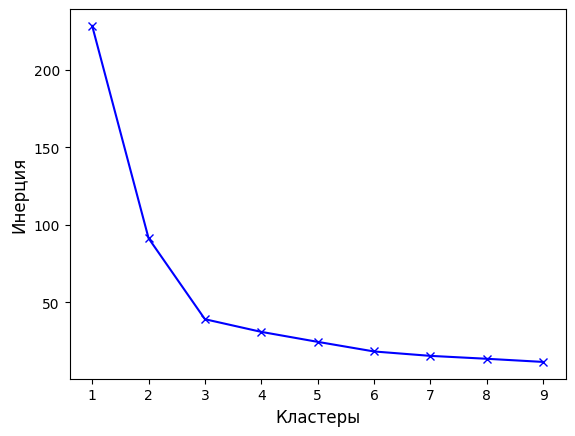

In [26]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, data):
    k_means =  KMeans(n_clusters=cluster_num,  random_state=42, n_init=10)
    k_means.fit(data)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, data))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

Видно что оптимально использовать 3-кластера

### График силуэта

Однако изгиб на графике также может быть представлен нечётко, то могут подойти другие методы, например коэффициент `силуэта`.

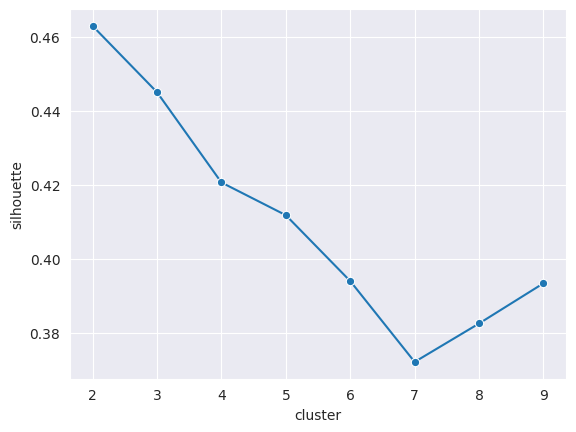

In [27]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, data):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42, n_init=10)
    k_means.fit(data)
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(data, k_means.predict(data))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные
data = data[['sepal length (cm)', 'sepal width (cm)']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, data))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")

# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")
plt.show()

График силуэта более наглядно показывает что 2-кластера самое оптимальное количество

### Иерархическая кластеризация

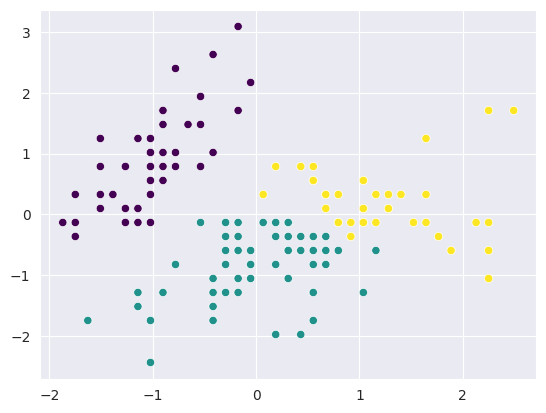

In [28]:
# Создаем объект класса AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3)

# Выполняем кластеризацию и получаем метки классов
predictions = clustering.fit_predict(X_scaled)
data['Clusters_agg'] = predictions

# Визуализируем результаты, изменяя цвета точек
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], c=predictions, cmap='viridis')
plt.show()


### Визуализация кластеризации в виде дендрограммы

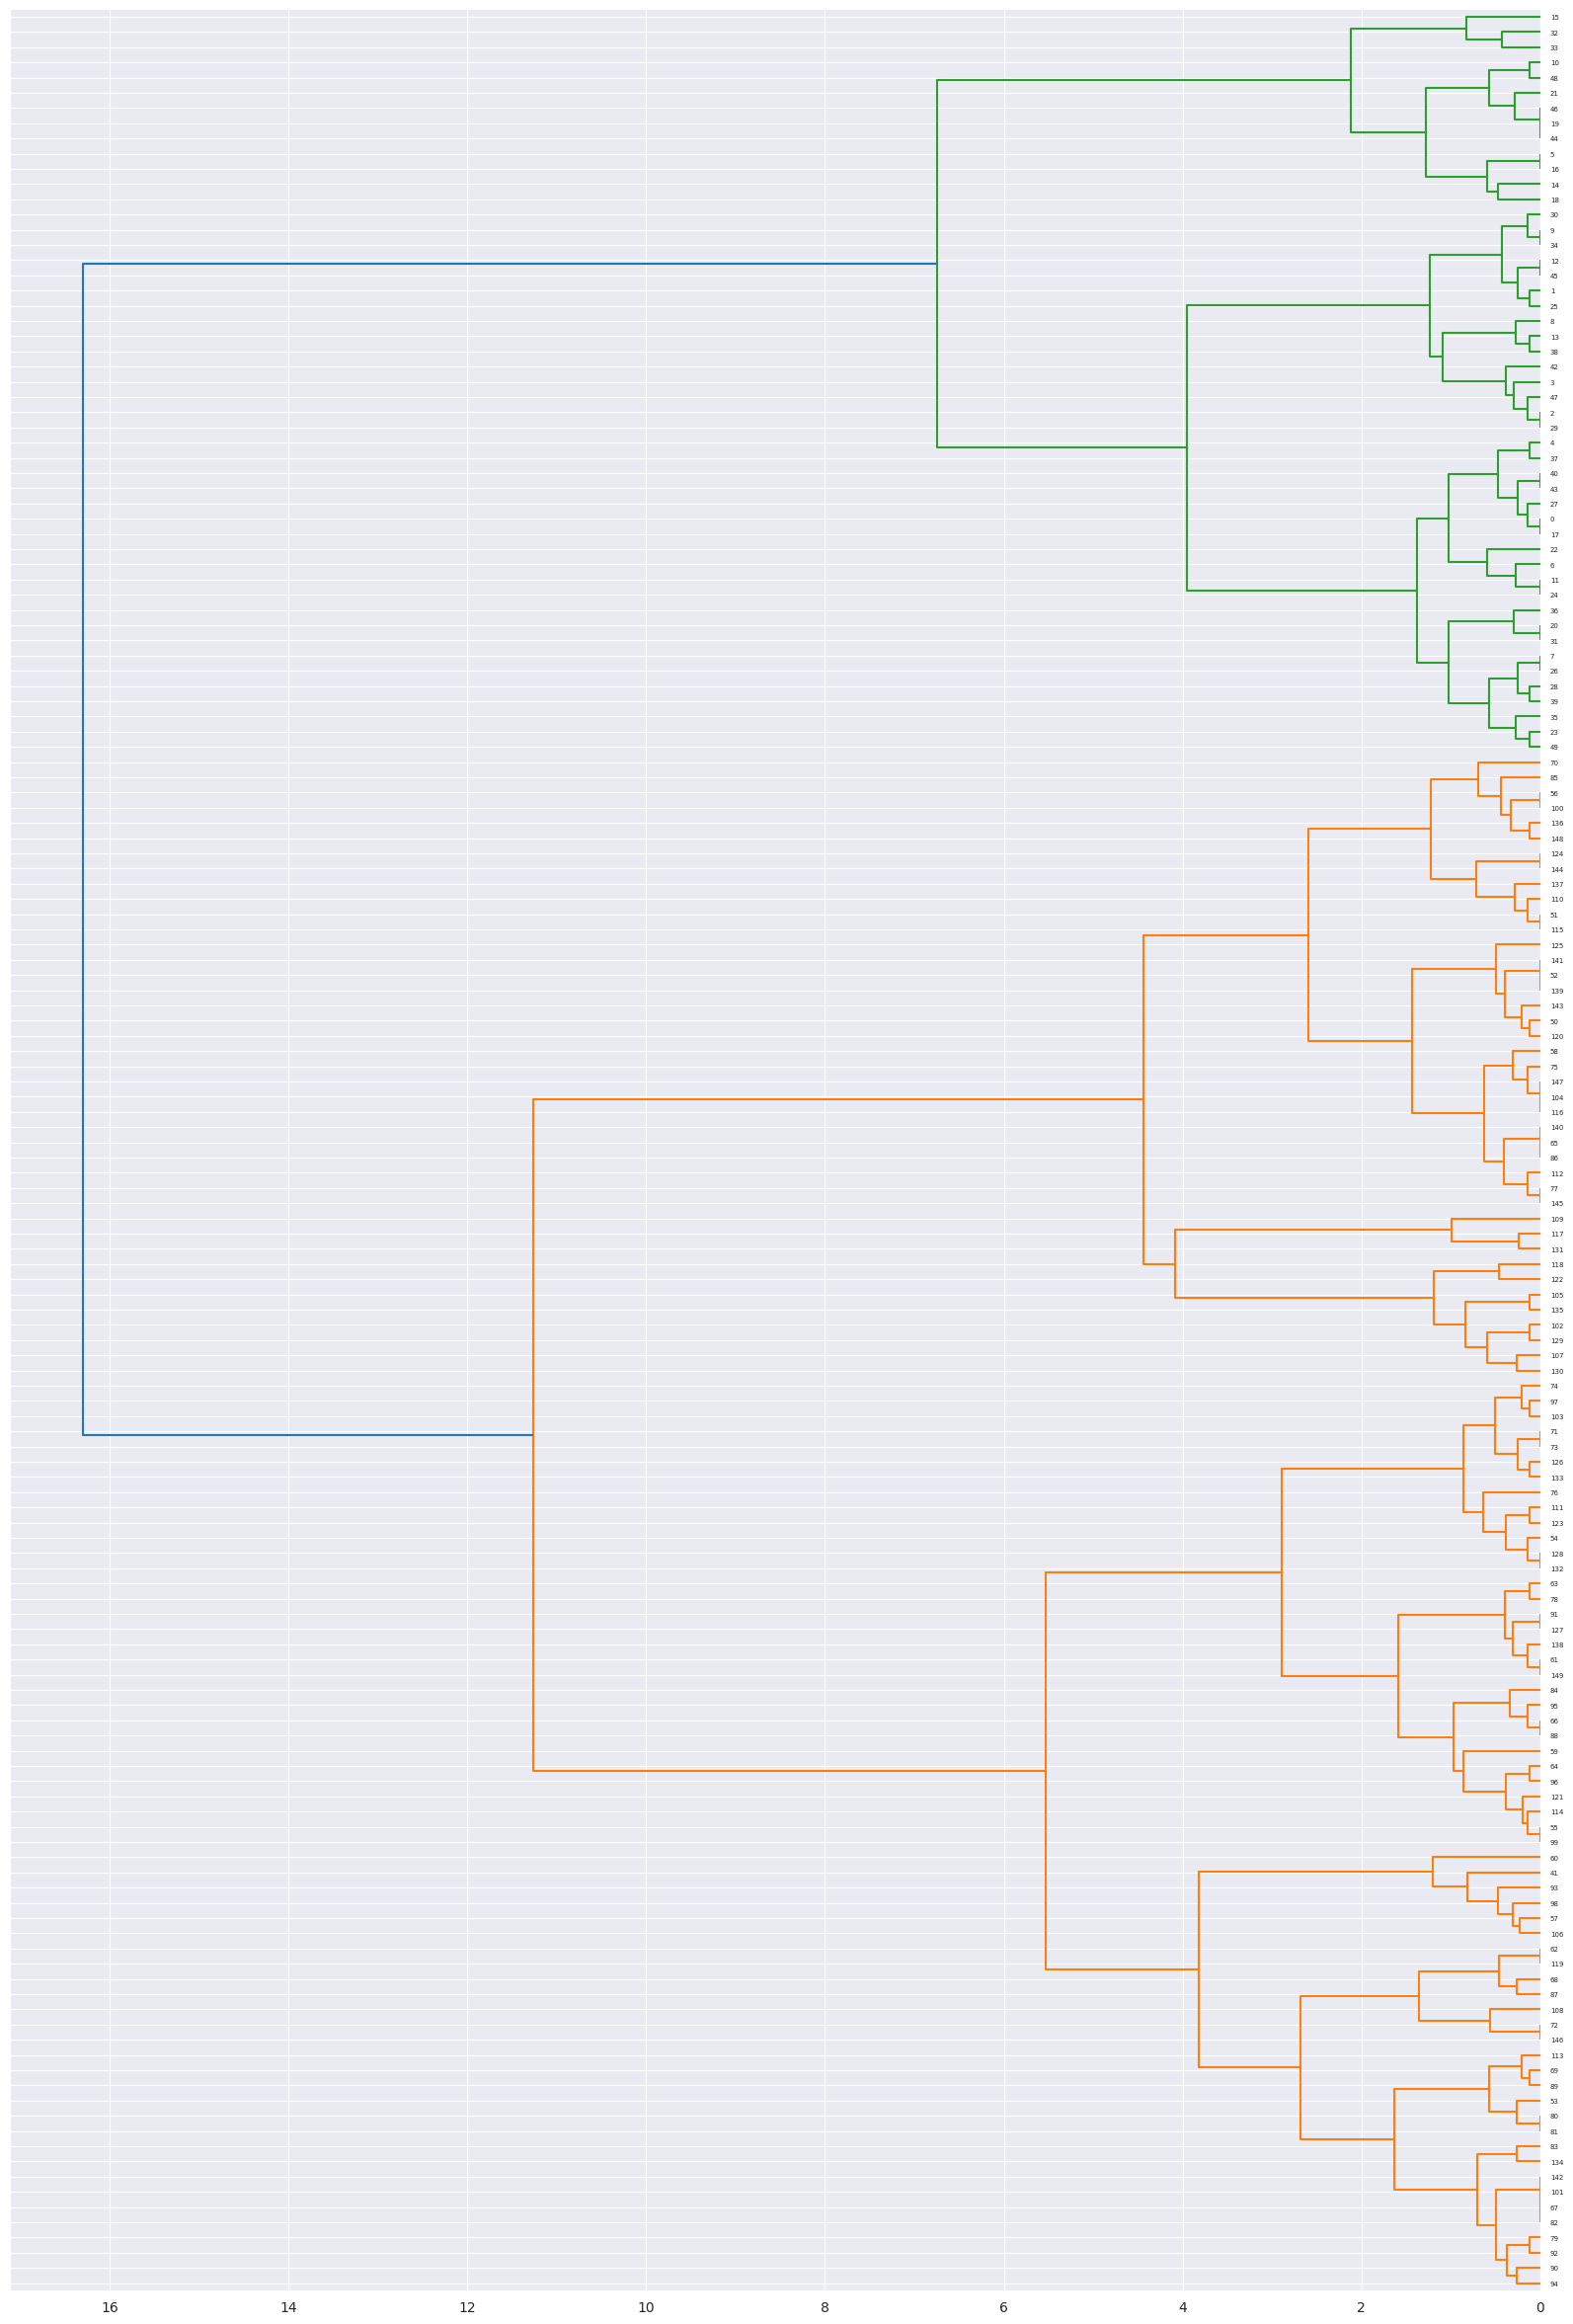

In [29]:
# выберем нужные данные
data = data[['sepal length (cm)', 'sepal width (cm)']]

# рассчитаем расстояния между кластерами
linked = linkage(X_scaled, 'ward')

plt.figure(figsize=(20, 30))

# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='left',
            labels=data.index,
            distance_sort='descending')

plt.show()

При данном методе мы так же, получаем оптимальное количество 2-кластера